# Twitter账户@WeRateDogs犬只分析报告

## 收集

#### 导入需要的库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('max_colwidth',150)

#### twitter_archive_enhanced 保存为DataFrame。

In [2]:
df_raw = pd.read_csv('twitter-archive-enhanced.txt',sep=',',header=0)

#### image-prediction.tsv 转换为DataFrame

In [3]:
df_img = pd.read_csv('image-predictions.tsv',sep='\t',header=0)

#### tweet_json.txt 转换为DataFrame格式
+ 出现错误：'ValueError: Trailing data'
+ 解决方法：添加参数line=True
+ 参考：https://stackoverflow.com/questions/30088006/loading-a-file-with-more-than-one-line-of-json-into-pandas


In [4]:
df_supl = pd.read_json('tweet_json.txt',lines=True)

## 评估

### 针对twitter-archive-enhanced.csv文件的评估

In [5]:
df_raw.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
128,867774946302451713,NaN,NaN,2017-05-25 16:10:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Harold. He's h*ckin cooperative. 13/10 good work Harold https://t.co/ZYg3NZGICa,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/867774946302451713/photo/1,https://twitter.com/dog_rates/status/867774946302451713/photo/1",13,10,Harold,None,None,None,None
762,778039087836069888,NaN,NaN,2016-09-20 01:12:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Evolution of a pupper yawn featuring Max. 12/10 groundbreaking stuff https://t.co/t8Y4x9DmVD,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/778039087836069888/photo/1,https://twitter.com/dog_rates/status/778039087836069888/photo/1,https://twitter.co...",12,10,None,None,None,pupper,None
468,817056546584727552,NaN,NaN,2017-01-05 17:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chloe. She fell asleep at the wheel. Absolute menace on the roadways. Sneaky tongue slip tho. 11/10 https://t.co/r6SLVN2VUH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817056546584727552/photo/1,11,10,Chloe,None,None,None,None
1220,714606013974974464,NaN,NaN,2016-03-29 00:12:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here are two lil cuddly puppers. Both 12/10 would snug like so much https://t.co/zO4eb7C4tG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714606013974974464/photo/1,12,10,None,None,None,None,None
1415,698703483621523456,NaN,NaN,2016-02-14 03:01:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rusty. He has no respect for POULTRY products. Unbelievable af. 7/10 would still pet https://t.co/hEH19t1eFp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698703483621523456/photo/1,7,10,Rusty,None,None,None,None


In [6]:
df_raw.shape

(2356, 17)

In [7]:
df_raw.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### 共有17个特征，2356条记录。

+ tweet_id，是每个tweet的唯一标识
+ 'in_reply_to_status_id',Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
+ 'in_reply_to_user_id', Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet.
+ 'timestamp',
+ 'source',Utility used to post the Tweet, as an HTML-formatted string. 
+ 'text',The actual UTF-8 text of the status update.tweet中的文本内容
+ 'retweeted_status_id',
+ 'retweeted_status_user_id',
+ 'retweeted_status_timestamp', 
+ 'expanded_urls',
+ 'rating_numerator',评分的分子部分，一般大于10，也可能存在小于10的情况。
+ 'rating_denominator',评分的分母部分，一般为10
+ 'name',来自tweet的文本内容，判断是犬只的名字。
+ 'doggo',一种犬只的等级，等级一共有四种。
+ 'floofer',一种犬只的等级，等级一共有四种。
+ 'pupper',一种犬只的等级，等级一共有四种。
+ 'puppo'，一种犬只的等级，等级一共有四种。

参考：
+ https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_raw.isnull().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [10]:
df_raw.duplicated(subset=['tweet_id','name']).sum()

0

In [11]:
df_raw['name'].value_counts().nlargest(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Penny       10
Tucker      10
Winston      9
Bo           9
Sadie        8
the          8
Bailey       7
Daisy        7
Toby         7
an           7
Buddy        7
Jax          6
Leo          6
Name: name, dtype: int64

In [12]:
df_raw[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [13]:
df_raw.rating_numerator.value_counts().nlargest(20)

12     558
11     464
10     461
13     351
9      158
8      102
7       55
14      54
5       37
6       32
3       19
4       17
1        9
2        9
420      2
0        2
15       2
75       2
80       1
20       1
Name: rating_numerator, dtype: int64

In [14]:
df_raw.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
for i in df_raw.text.values[:5]:
    display(i) 

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'

'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ'

'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f'

In [16]:
df_raw.query("name == 'a'").text.values[:5]

array(['Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF',
       'Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq',
       'Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn',
       'This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW',
       'Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R'],
      dtype=object)

In [17]:
df_raw[df_raw.rating_numerator==45].text.values

array(['From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK'],
      dtype=object)

In [18]:
df_raw[df_raw.rating_numerator==1776].text.values

array(["This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"],
      dtype=object)

In [19]:
df_raw[df_raw.rating_numerator==0].text.values[:]

array(["When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
       "PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"],
      dtype=object)

In [20]:
df_raw[df_raw.rating_numerator==420].text.values[:1]

array(['@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research'],
      dtype=object)

In [21]:
df_raw[df_raw.rating_numerator==20].text.values[:1]

array(["I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible"],
      dtype=object)

In [22]:
df_raw[df_raw.rating_denominator==170].text.values

array(['Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'],
      dtype=object)

In [23]:
df_raw[(df_raw.in_reply_to_status_id.notnull())&(df_raw.in_reply_to_user_id.notnull())].shape

(78, 17)

In [24]:
df_raw[(df_raw.rating_numerator>20)&(df_raw.rating_denominator>10)].shape

(13, 17)

#### 评估df_raw小结：
+ 'timestamp'，'retweeted_status_timestamp'的数据类型是object
+ 'rating_numerator','rating_denominator',最大值分别为1776和170，分别大于均值13和10。
+  'rating_numerator',存在较大的值，比如45，对应的'rating_denominator'是50，这是5只犬只评分的分子和分母。
+ 'in_reply_to_status_id ','in_reply_to_user_id','retweeted_status_id ','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'存在null
+ 犬的等级分布在四个列中。
+ 有些犬只没有等级分类。数值是None,不是null
+ 有些犬只没有名字，数值是None,而不是null
+ 一些犬只的名字是'an','the'或者'a'.
+ timestamp的类型是object

### 针对image-prediction.tsv文件的评估

In [25]:
df_img.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
629,680913438424612864,https://pbs.twimg.com/media/CXMXKKHUMAA1QN3.jpg,1,Pomeranian,0.615678,True,golden_retriever,0.126455,True,Chihuahua,0.087184,True
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
872,697990423684476929,https://pbs.twimg.com/media/Ca_ClYOW0AAsvpE.jpg,2,Pembroke,0.984783,True,Cardigan,0.015018,True,Shetland_sheepdog,0.000074,True
531,676821958043033607,https://pbs.twimg.com/media/CWSN-vaXAAA8Ehr.jpg,2,Great_Pyrenees,0.869804,True,kuvasz,0.079814,True,standard_poodle,0.013263,True
1700,817056546584727552,https://pbs.twimg.com/media/C1bEl4zVIAASj7_.jpg,1,kelpie,0.864415,True,French_bulldog,0.097456,True,German_shepherd,0.008526,True


In [26]:
df_img.shape

(2075, 12)

In [27]:
df_img.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### 共有12个特征，2075条记录。

+ tweet_id，是每个tweet的唯一标识
+ jpg_url 是预测的图像资源链接
+ img_num 最可信的预测结果对应的图像编号.
+ p1 是算法对推特中图片的一号预测 
+ p1_conf 是算法的一号预测的可信度
+ p1_dog 是一号预测该图片是否属于“犬”（有可能是其他物种，比如熊、马等）,True表示图片属于犬类
+ p2 是算法对推特中图片预测的第二种可能性
+ p2_conf 是算法的二号预测的可信度
+ p2_dog 是二号预测该图片是否属于“犬”.
+ p3 图片预测的第三种可能性
+ p3_conf 三号预测的可信度
+ p3_dog 三号预测的图片是否属于犬。

参考：
+ udactiy

In [28]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
df_img.isna().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

In [31]:
df_img.duplicated(subset=['tweet_id'],keep="first").sum()

0

In [32]:
df_img[(df_img.p1_conf>=df_img.p2_conf)&(df_img.p2_conf>=df_img.p3_conf)|(df_img.p1_conf>=df_img.p3_conf)].shape

(2075, 12)

In [33]:
df_img.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [34]:
len(df_img.query("img_num >1"))

295

In [35]:
df_img.p1.str.istitle().sum()

402

In [36]:
df_img.p1.str.islower().sum()

1135

In [37]:
df_img[df_img.p1.str.istitle()].head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
15,666099513787052032,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,1,Lhasa,0.58233,True,Shih-Tzu,0.166192,True,Dandie_Dinmont,0.089688,True


In [38]:
df_img[~((df_img.p1.str.istitle())|(df_img.p1.str.islower()))].head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### 评估df_img小结：
+ p2,p2_conf,p3,p3_conf,p2_dog,p3_dog这些列，不需要。
+ img_num 表示对应的图片的编号，不需要这个列。
+ p1，犬的类型，存在大小写不一致的情况。



### 针对tweet_json.txt文件的评估

In [39]:
df_supl.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1692,NaN,NaN,2015-12-27 22:37:04,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 681242414783201280, 'id_str': '681242414783201280', 'indices': [...","{'media': [{'id': 681242414783201280, 'id_str': '681242414783201280', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CXRCXesVAAAr...",1638,False,This is Champ. He's being sacrificed to the Aztec sun god Huitzilopochtli. So sad. 10/10 Champ doesn't deserve this https://t.co/VGsziXImoy,NaN,681242418453299201,681242418453299200,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,618,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', '..."
1016,NaN,NaN,2016-06-25 17:31:25,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/bROYbceZ1u', 'expanded_url': 'https://vine.co/v/5BYq6hmrEI3', ...",NaN,10466,False,This is Maddie. She gets some wicked air time. Hardcore barkour. 11/10 nimble af https://t.co/bROYbceZ1u,NaN,746757706116112384,746757706116112384,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,4411,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', '..."
248,NaN,NaN,2017-03-23 18:29:57,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 844979535204429824, 'id_str': '844979535204429824', 'indices': [...","{'media': [{'id': 844979535204429824, 'id_str': '844979535204429824', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/C7n4aQ5VsAAc...",14678,False,"PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B",NaN,844979544864018432,844979544864018432,dog_rates,7.590995e+17,7.590995e+17,4.196984e+09,4.196984e+09,False,en,None,0.0,0.0,NaN,NaN,NaN,2891,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', '..."
897,NaN,NaN,2016-07-28 01:31:38,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 758474885559615488, 'id_str': '758474885559615488', 'indices': [...","{'media': [{'id': 758474885559615488, 'id_str': '758474885559615488', 'indices': [109, 132], 'media_url': 'http://pbs.twimg.com/media/Coak48zWAAAh...",4205,False,This is Brandonald. He accidentally opened the front facing camera. Playing it off rather heckin well. 11/10 https://t.co/uPUAotqQtM,NaN,758474966123810816,758474966123810816,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,1125,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', '..."
860,NaN,NaN,2016-08-08 01:44:46,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 762464530748145664, 'id_str': '762464530748145664', 'indices': [...","{'media': [{'id': 762464530748145664, 'id_str': '762464530748145664', 'indices': [114, 137], 'media_url'

In [40]:
df_supl.shape

(2352, 31)

In [41]:
df_supl.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

#### 共有31个特征，2352条记录。

+ favorite_count，tweet被点赞的次数，反映阅读者对此tweet内容是否喜欢。
+ retweet_count，tweet被转发的次数，反映阅读者对此tweet内容喜欢的程度。
+ id,tweet的唯一标识


In [42]:
df_supl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null float64
id                               2352 non-null int64
id_str                           2352 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [43]:
df_supl[['favorite_count','retweet_count']].describe()

,favorite_count,retweet_count
count,2352.000000,2352.000000
mean,8109.198980,3134.932398
std,11980.795669,5237.846296
min,0.000000,0.000000
25%,1417.000000,618.000000
50%,3596.500000,1456.500000
75%,10118.000000,3628.750000
max,132318.000000,79116.000000


#### 评估df_img小结：
+ 保留favorite_count,retweet_count,id这两个列，其余列不需要。
+ 这个数据集是关于犬的类型，与df_raw都是存储犬只这个observation。
+ id的数据类型是int64
+ 考虑是否从entities列中获取id，与现有的id列的数据进行验证



### 评估总结：

#### 质量

#####  **twitter-archive-enhanced数据**
+ 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'，'retweeted_status_timestamp',,'source'这些列不需要。
+ 有些犬没有名字，数值是None,'an','the'或者'a'.而不是null
+ 有些犬没有等级分类。数值是None,不是null
+ 'rating_numerator','rating_denominator',最大值分别为1776和170，分别大于均值13和10
+ timestamp的类型是object，tweet_id的类型是int64

##### **image-prediction数据**
+ p1，犬只的类型，存在大小写不一致的情况。
+ p2,p2_conf,p3,p3_conf,p2_dog,p3_dog.img_num这些列，不需要。

##### **tweet_json数据**
+ 保留favorite_count,retweet_count,id这三个特征列，其余列不需要。


#### 整洁度
+ df_raw,df_img，df_supl的observation都是dog
+ df_raw中犬只的等级分布在四个列中。
+ df_img中使用'p1','p1_dog'两个列表述犬只的种类


## 清理

### 清理数据质量问题

#### 备份三个数据集

In [44]:
df_raw_clean = df_raw.copy()
df_img_clean = df_img.copy()
df_supl_clean = df_supl.copy()

#### 清理不需要的特征

##### 定义
+ 从df_raw删除下列不需要的列： 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'， 'timestamp'，'retweeted_status_timestamp','source'

+ 从df_img中删除p2,p2_conf,p3,p3_conf,p2_dog,p3_dog.img_num这些列

+ 从df_supl删除除了下列三个列'favorite_count','retweet_count','id'之外的其他列。

##### 代码

In [45]:
df_raw_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                            'retweeted_status_timestamp','expanded_urls','retweeted_status_timestamp','source'],inplace=True)
df_img_clean.drop(columns=['p2','p2_conf','p3','p3_conf','p2_dog','p3_dog','img_num'],inplace=True)
df_supl_clean = df_supl_clean[['id','favorite_count','retweet_count']]

##### 测试

In [46]:
df_raw_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [47]:
df_img_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog'], dtype='object')

In [48]:
df_supl_clean.columns

Index(['id', 'favorite_count', 'retweet_count'], dtype='object')

#### 清理空值

##### 定义
+ replace方法对df_raw中的'name'中的'a','an','the'替换为"None"
+ 使用dropna方法清理空值以及相应的记录。

##### 代码

In [49]:
df_raw_clean.name.replace(['a','an','the'],"None",inplace=True)
df_raw_clean.dropna(axis='index',inplace=True)

##### 测试

In [50]:
df_raw_clean.name.isnull().sum()

0

#### 清理数据类型

##### 定义
+ 使用astype或者to_datatime方法将df_raw中的'timestamp'的数据类型改为Datetime类型
+ 使用astype方法将df_raw,df_img中的'tweet_id'，以及df_supl中的'id'的数据类型改为str类型

##### 代码

In [51]:
df_raw_clean.timestamp = pd.to_datetime(df_raw_clean.timestamp)
df_raw_clean.tweet_id = df_raw_clean.tweet_id.astype(str)
df_img_clean.tweet_id = df_img_clean.tweet_id.astype(str)
df_supl_clean.id = df_supl_clean.id.astype(str)

##### 测试

In [52]:
df_raw_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
text                          object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

In [53]:
df_img_clean.dtypes

tweet_id     object
jpg_url      object
p1           object
p1_conf     float64
p1_dog         bool
dtype: object

In [54]:
df_supl_clean.dtypes

id                object
favorite_count     int64
retweet_count      int64
dtype: object

#### 清理一致性问题

##### 定义
+ 使用str.title()将df_img中'p1'中犬的类型的格式进行统一化处理。

##### 代码

In [55]:
df_img_clean.p1=df_img_clean.p1.str.title()

##### 测试

In [56]:
df_img_clean.p1.str.istitle().shape[0]== df_img_clean.shape[0]

True

#### 清理异常值问题

##### 定义

+ 过滤掉df_raw中'rating_numerator'以及'rating_denominator'中分子大于20，分母大于10的记录。

##### 代码

In [57]:
df_raw_clean = df_raw_clean[~((df_raw_clean.rating_numerator>20)|(df_raw_clean.rating_denominator>10))]

##### 测试

In [58]:
df_raw_clean.describe()

,rating_numerator,rating_denominator
count,2325.000000,2325.000000
mean,10.702796,9.996559
std,2.188575,0.165912
min,0.000000,2.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,17.000000,10.000000


In [59]:
df_raw_clean[df_raw_clean.rating_denominator==0]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 清理数据整洁度

#### 清理多个列表示一个特征的问题

##### 定义
+ 过滤掉df_img文件中'p1_dog'为False的记录
+ 创建df_temp，是df_raw的切片，包含'doggo','floofer','pupper','puppo'四个列，并添加'stage'列
+ 使用apply方法将df_raw中'doggo','floofer','pupper','puppo'四个列合并为'stage',
+ 使用drop方法，删除df_raw中的'doggo','floofer','pupper','puppo'四个列，并将df_temp中的'stage'合并到df_raw中。

##### 代码

In [60]:
df_img_clean = df_img_clean[df_img_clean.p1_dog==True]

In [61]:
df_temp= df_raw_clean.loc[:,['doggo','floofer','pupper','puppo']]
df_temp["stage"]=np.nan
stage_list = df_temp.columns[:-1].tolist()
def to_stage(df):
    for c in stage_list:
        if df[c] == c:
            return c
    return "None"
df_temp["stage"]=df_temp.apply(to_stage,axis=1)
df_temp.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)
df_raw_clean = pd.concat([df_raw_clean,df_temp],axis=1)
df_raw_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

##### 测试

In [62]:
df_img_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

In [63]:
df_raw_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

In [64]:
df_raw_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
1754,678798276842360832,2015-12-21 04:44:55,This is Linda. She fucking hates trees. 7/10 https://t.co/blaY85FIxR,7,10,Linda,None
1992,672614745925664768,2015-12-04 03:13:46,This is Norman. Doesn't bark much. Very docile pup. Up to date on current events. Overall nifty pupper. 6/10 https://t.co/ntxsR98f3U,6,10,Norman,pupper
629,794355576146903043,2016-11-04 01:48:22,RT @dog_rates: This is Butter. She can have whatever she wants forever. 12/10 would hug softly https://t.co/x5gXRS1abq,12,10,Butter,None
2115,670428280563085312,2015-11-28 02:25:32,This is Willy. He's millennial af. 11/10 https://t.co/Fm1SvVLsad,11,10,Willy,None
2278,667435689202614272,2015-11-19 20:14:03,Ermergerd 12/10 https://t.co/PQni2sjPsm,12,10,None,None


#### 清理多个数据表描述统一个observation的问题

##### 定义
+ 使用drop方法清理df_img中不必要的列:'p1_dog','p1_conf'
+ 使用rename方法，将df_supl中的'id'改为'tweet_id'
+ 使用merge函数，将df_raw，df_supl,df_img,三个数据集，按照'tweed_id'进行左连接。
+ 使用rename方法，将df_img中的'p1'改为'dog_type'

##### 代码

In [65]:
df_img_clean.drop(columns=['p1_dog','p1_conf'],inplace=True)
df_supl_clean.rename(columns={'id':'tweet_id'},inplace=True)

In [66]:
df_archive_master = pd.merge(df_raw_clean,df_supl_clean,on='tweet_id',how='left')
df_archive_master = pd.merge(df_archive_master,df_img_clean,on='tweet_id',how='left')

In [67]:
df_archive_master.rename(columns={'p1':'dog_type'},inplace=True)

##### 测试

In [68]:
df_archive_master.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,dog_type
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,39492.0,8842.0,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",13,10,Tilly,None,33786.0,6480.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,25445.0,4301.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,42863.0,8925.0,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",12,10,Franklin,None,41016.0,9721.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset


In [69]:
df_archive_master.tail(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,dog_type
2320,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,None,None,111.0,41.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_Pinscher
2321,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10,None,None,309.0,147.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_Ridgeback
2322,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,None,None,128.0,47.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_Shepherd
2323,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,None,None,132.0,48.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone
2324,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,8,10,None,None,2528.0,530.0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_Springer_Spaniel


In [70]:
df_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 11 columns):
tweet_id              2325 non-null object
timestamp             2325 non-null datetime64[ns]
text                  2325 non-null object
rating_numerator      2325 non-null int64
rating_denominator    2325 non-null int64
name                  2325 non-null object
stage                 2325 non-null object
favorite_count        2322 non-null float64
retweet_count         2322 non-null float64
jpg_url               1515 non-null object
dog_type              1515 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 218.0+ KB


### 存储清理后的主数据集

In [71]:
# 将清理后的主数据集保存为 csv 文件
df_archive_master.to_csv('twitter_archive_master.csv',encoding='utf-8')

## 分析和可视化

#### 读取存储数据集

In [72]:
df_visual= pd.read_csv('twitter_archive_master.csv',header=0,index_col =0)

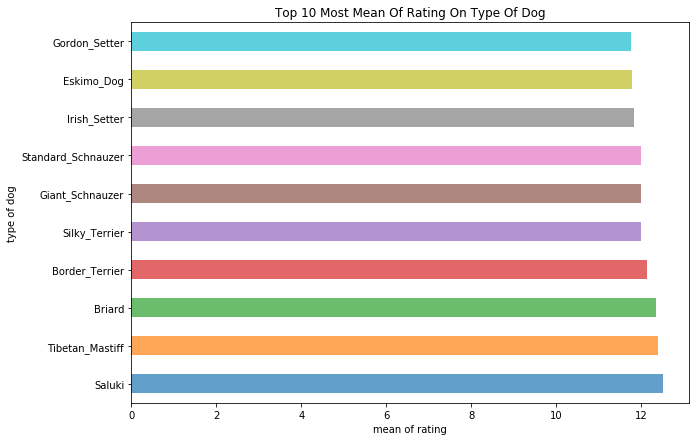

In [73]:
plt.figure(figsize=(10,7))
dog_type_rating_mean = df_visual.groupby('dog_type')['rating_numerator'].mean().sort_values(ascending=False)
dog_type_rating_mean.iloc[:10].plot(kind ="barh",alpha=0.7)
plt.xlabel('mean of rating')
plt.ylabel("type of dog")
plt.title("top 10 most mean of rating on type of dog".title())
plt.show()

In [74]:
dog_type_rating_mean.iloc[:10]

dog_type
Saluki                12.500000
Tibetan_Mastiff       12.400000
Briard                12.333333
Border_Terrier        12.142857
Silky_Terrier         12.000000
Giant_Schnauzer       12.000000
Standard_Schnauzer    12.000000
Irish_Setter          11.833333
Eskimo_Dog            11.777778
Gordon_Setter         11.750000
Name: rating_numerator, dtype: float64

>观点：
+ "Saluki"类犬平均得分最高,平均得分12.50
+ 其次是"Tibetan_Mastiff"和'Briand'类犬.分别是12.40和12.33

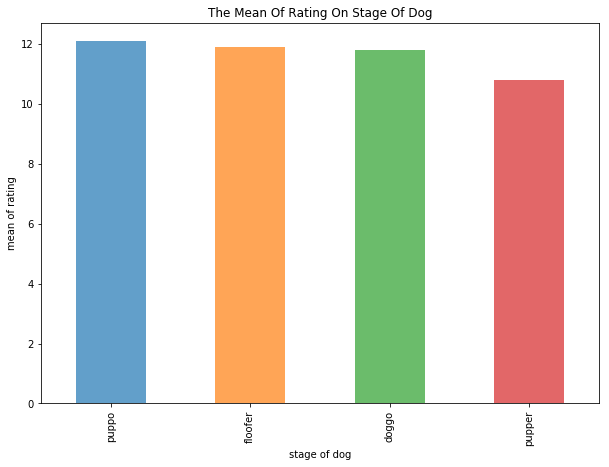

In [75]:
plt.figure(figsize=(10,7))
stage_rating_mean = df_visual[df_visual.stage!='None'].groupby('stage')['rating_numerator'].mean().sort_values(ascending=False)
stage_rating_mean.plot(kind ="bar",alpha=0.7)
plt.ylabel('mean of rating')
plt.xlabel("stage of dog")
plt.title("The mean of rating on stage of dog".title())
plt.show()

In [76]:
stage_rating_mean

stage
puppo      12.103448
floofer    11.888889
doggo      11.804124
pupper     10.786885
Name: rating_numerator, dtype: float64

>观点：
+ 地位为'puppp'的犬平均得分最高,平均得分12.10
+ 地位为'pupper'的犬平均得分最低，平均得分为 10.78

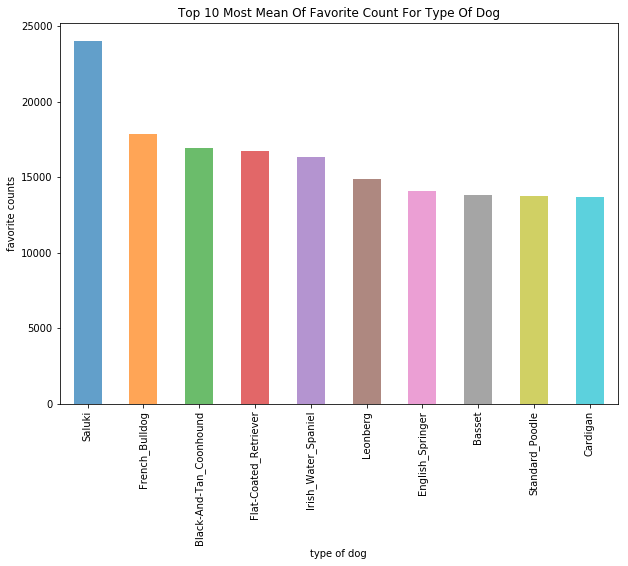

In [77]:
plt.figure(figsize=(10,7))
dog_type_favorite_mean = df_visual[df_visual.dog_type!='None'].groupby('dog_type')['favorite_count'].mean().sort_values(ascending=False)
dog_type_favorite_mean.iloc[:10].plot(kind ="bar",alpha=0.7)
plt.xlabel('type of dog')
plt.ylabel("favorite counts")
plt.title("Top 10 most mean of favorite count for type of dog".title())
plt.show()

In [78]:
dog_type_favorite_mean.iloc[:10]

dog_type
Saluki                     23996.250000
French_Bulldog             17854.769231
Black-And-Tan_Coonhound    16952.500000
Flat-Coated_Retriever      16731.625000
Irish_Water_Spaniel        16335.333333
Leonberg                   14870.000000
English_Springer           14068.100000
Basset                     13830.076923
Standard_Poodle            13765.625000
Cardigan                   13646.263158
Name: favorite_count, dtype: float64

>观点：
+ "Saluki"类犬平均点赞数最高,平均为23996次
+ 其次是"French_Bulldog "和'Black-And-Tan_Coonhound '类犬.分别是17854和16952次

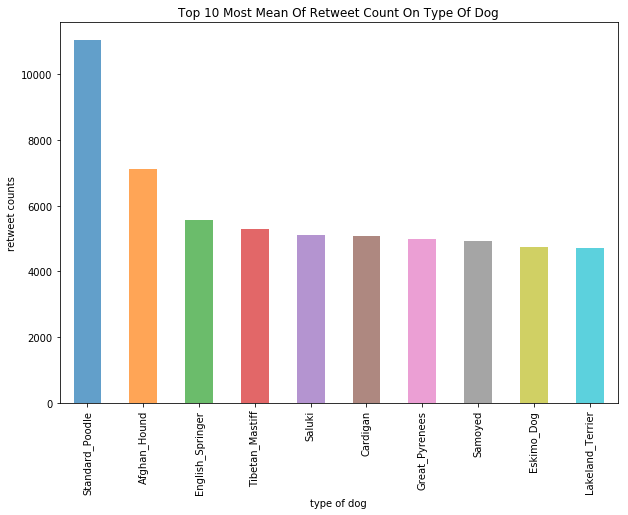

In [79]:
plt.figure(figsize=(10,7))
dog_type_retweet_mean = df_visual[df_visual.dog_type!='None'].groupby('dog_type')['retweet_count'].mean().sort_values(ascending=False)
dog_type_retweet_mean.iloc[:10].plot(kind ="bar",alpha=0.7)
plt.xlabel("type of dog")
plt.ylabel('retweet counts')
plt.title("Top 10 most mean of retweet count on type of dog".title())
plt.show()

In [80]:
dog_type_retweet_mean.iloc[:10]

dog_type
Standard_Poodle     11032.500000
Afghan_Hound         7127.750000
English_Springer     5568.000000
Tibetan_Mastiff      5305.600000
Saluki               5103.250000
Cardigan             5091.526316
Great_Pyrenees       4987.153846
Samoyed              4912.767442
Eskimo_Dog           4742.444444
Lakeland_Terrier     4701.294118
Name: retweet_count, dtype: float64

>观点：
+ 'Standard_Poodle'类犬平均转发数最高,平均为11033次
+ 其次是"Afghan_Hound"和'English_Springer'类犬.分别是7127和5568次
+ 'Saluki'类犬虽然平均点赞次数最多，但是转发次数只能屈居第五位。

### 总结和展望
+ 本报告主要着眼与数据集关于犬只评分，以及相关点赞和转发等特征的分析和可视化。发掘该@WeRateDog账户中，评分较高的犬只类型，犬只地位，以及点赞数较高，转发数较高的相关犬只类型。通过可视化分析，我们发现：
    1. "Saluki"类犬平均得分最高,平均得分12.50，其次是"Tibetan_Mastiff"和'Briand'类犬.分别是12.40和12.33，
    2. 地位为'puppp'的犬平均得分最高,平均得分12.10，地位为'pupper'的犬平均得分最低，平均得分为 10.78,
    3. "Saluki"类犬平均点赞数最高,平均为23996次,其次是"French_Bulldog "和'Black-And-Tan_Coonhound '类犬.分别是17854和16952次
    4. 'Standard_Poodle'类犬平均转发数最高,平均为11033次,其次是"Afghan_Hound"和'English_Springer'类犬.分别是7127和5568次,'Saluki'类犬虽然平均点赞次数最多，但是转发次数只能屈居第五位。
    
+ 当然，以上的结论存在局限性，首先数据集不够大，只有二千余条数据；其次，收集数据主要是从2014年至2017年，不能反映现在的实际情况；第三，数据的特征不足，缺少点赞或者转发账户信息，同时tweet文本信息过于程式化，没有收集到评论信息，并且没有对这些信息进行情感分析。这些都是需要通过加强相关数据的收集，以及借助相关模型和工具来进一步解决的。
+ 局限性还体现在本报告的关注点上，没有关注twitter账户本身的特征，比如与点赞数和转发数相关的特征，评分的相关的特征分析等等。这些都是需要后续来进行研究和解决的内容。